<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [2]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


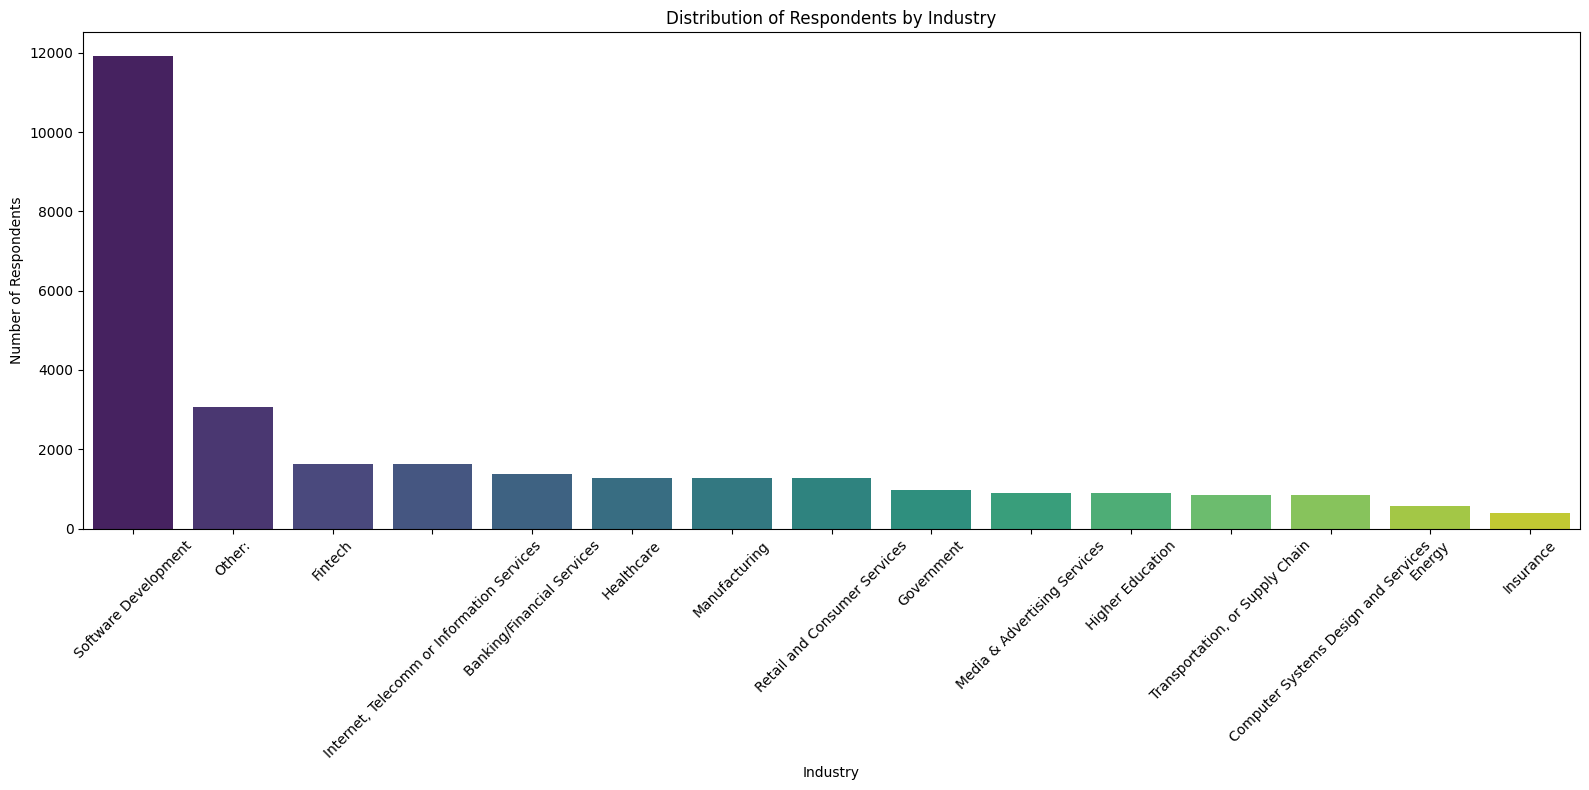

In [14]:
##Write your code here
plt.figure(figsize=(16, 8)) 
industry_counts = df['Industry'].value_counts()
sns.barplot(x=industry_counts.index, y=industry_counts.values, hue=industry_counts.index, palette="viridis")  
plt.title('Distribution of Respondents by Industry')
plt.xlabel('Industry')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [20]:
##Write your code here

#Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.
print("Basic statistics for the column ConvertedCompYearly : ")
print("Mean : ", df['ConvertedCompYearly'].mean())
print("Median : ", df['ConvertedCompYearly'].median())
print("Standard Deviation : ", df['ConvertedCompYearly'].std())

#Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).
ExceededThreshold = df['ConvertedCompYearly'].mean() + (3 * df['ConvertedCompYearly'].std())
Comp_outliers = df[df['ConvertedCompYearly'] > ExceededThreshold]

print("Compensation values exceeding a defined threshold")
print(Comp_outliers[['ResponseId', 'ConvertedCompYearly']])




Basic statistics for the column ConvertedCompYearly : 
Mean :  86155.28726264134
Median :  65000.0
Standard Deviation :  186756.97308629757
Compensation values exceeding a defined threshold
       ResponseId  ConvertedCompYearly
529           530             650000.0
828           829            1000000.0
1932         1933             945000.0
2171         2172             750000.0
2187         2188            2000000.0
...           ...                  ...
38219       38220            1000000.0
39643       39644            1300000.0
40066       40067             800000.0
40952       40953             750000.0
41027       41028             700000.0

[89 rows x 2 columns]


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


IQR is :  75259.5
Lower bound is : -80177.25
Upper bound is : 220860.75
Number of outliers :  978


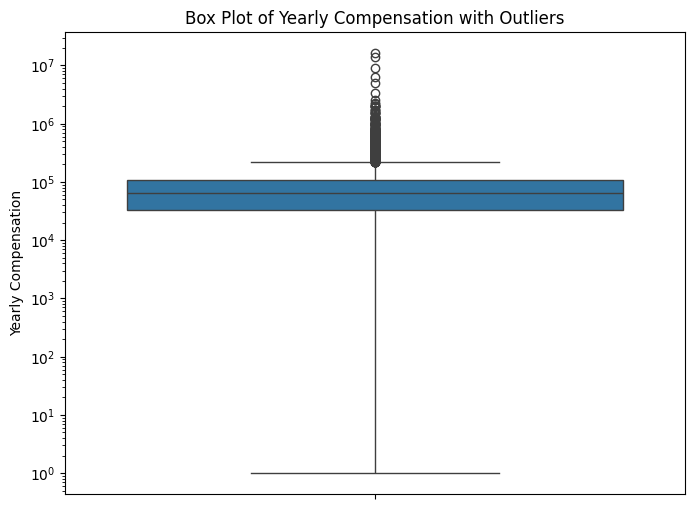

In [22]:
##Write your code here
# Calculate the Interquartile Range (IQR).
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1
print("IQR is : ", IQR)

# Determine the upper and lower bounds for outliers.
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['ConvertedCompYearly'] < lower_bound) | (df['ConvertedCompYearly'] > upper_bound)]

print("Lower bound is :", lower_bound)
print("Upper bound is :", upper_bound)
print("Number of outliers : ",len(outliers))


#Visualize outliers using a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(y='ConvertedCompYearly', data=df)
plt.title('Box Plot of Yearly Compensation with Outliers')
plt.ylabel('Yearly Compensation')
plt.yscale('log') 
plt.show()


<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [24]:
##Write your code here
#Create a new DataFrame excluding rows with outliers in ConvertedCompYearly
New_DF_Without_Outliers = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]

print("Size of original dataframe : ",len(df))
print("Size of the new dataframe without outliers : ", len(New_DF_Without_Outliers))

Size of original dataframe :  65437
Size of the new dataframe without outliers :  22457


<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


Correlation between Age and other numeric variables : 
                     ResponseId  CompTotal   WorkExp  JobSatPoints_1  \
ResponseId             1.000000  -0.000000  0.011955       -0.002406   
CompTotal             -0.000000   0.000000  0.028766       -0.004891   
WorkExp                0.011955   0.028766  1.000000       -0.026490   
JobSatPoints_1        -0.002406  -0.004891 -0.026490        1.000000   
JobSatPoints_4        -0.015738  -0.002719 -0.067241        0.445710   
JobSatPoints_5        -0.014197  -0.003033 -0.104525        0.633765   
JobSatPoints_6        -0.001908  -0.006311 -0.065352        0.618618   
JobSatPoints_7         0.001843  -0.005893 -0.101461        0.603157   
JobSatPoints_8        -0.002968  -0.004585 -0.046958        0.627385   
JobSatPoints_9         0.001991  -0.004494 -0.088090        0.597527   
JobSatPoints_10       -0.005365  -0.003198 -0.113707        0.585087   
JobSatPoints_11       -0.005865  -0.003045 -0.108279        0.607792   
Converted

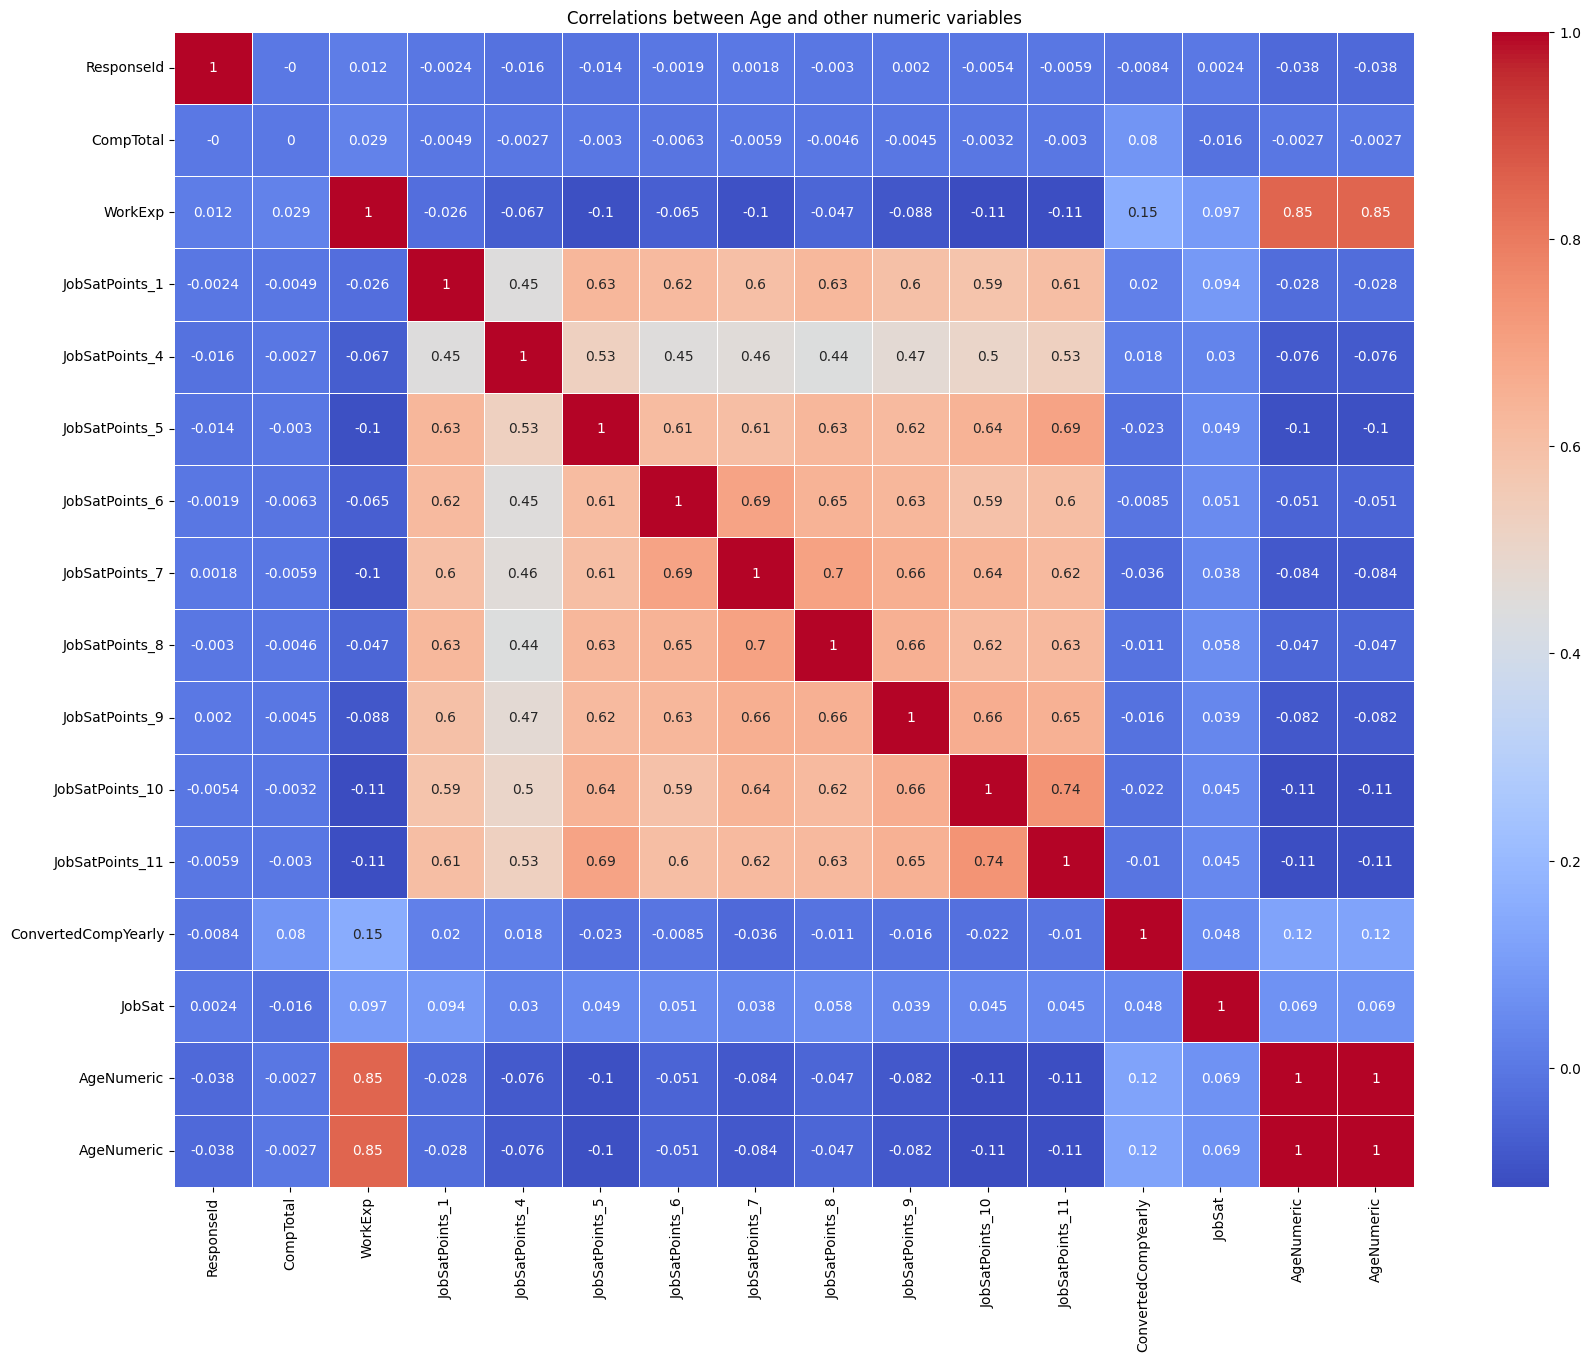

In [27]:
##Write your code here

#Map the Age column to approximate numeric values.
agemap = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 51,
    '55-64 years old': 59,
    '65 years or older': 67,
    'Prefer not to say': None
}
df['AgeNumeric'] = df['Age'].map(agemap)

# Select numerical columns
OtherNum_Cols = df.select_dtypes(include=['float64', 'int64']).columns
OtherNum_Cols = OtherNum_Cols.append(pd.Index(['AgeNumeric']))

#Compute correlations between Age and other numeric variables.
print("Correlation between Age and other numeric variables : ")
print(df[OtherNum_Cols].corr())

#Visualize the correlation matrix.
plt.figure(figsize=(20, 15))
sns.heatmap(df[OtherNum_Cols].corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlations between Age and other numeric variables')
plt.show()

<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
